# DATA CLEANING

## Import Library dan data yang dibutuhkan

In [2]:
import pandas as pd
data = pd.read_csv("Dataset/dqlab_telco.csv")
print(data.head())
print("\nBentuk Data :",data.shape)
print("Jumlah ID yang unik :",data["customerID"].nunique())

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0 

## Memfilter data berdasarkan aturan untuk nilai customerID :

In [3]:
data['valid_id'] = data["customerID"].str.match(r'^45[0-9]{9,10}')
data = (data[data['valid_id']==True]).drop('valid_id',axis=1)
print("Jumlah data yang terfilter :",data['customerID'].count())

Jumlah data yang terfilter : 7006


## Membuang data yang terduplikasi

In [4]:
data.drop_duplicates(inplace=True) # Secara keseluruhan
data = data.sort_values(by='UpdatedAt',ascending=False).drop_duplicates(['customerID']) # Untuk kolom customerID
print("Jumlah data yang terfilter :",data['customerID'].count())

Jumlah data yang terfilter : 6993


## Membuang data Missing Values pada kolom Churn

In [5]:
print("Jumlah Missing Values pada kolom Churn :",data['Churn'].isna().sum())
data.dropna(subset=["Churn"],inplace=True)
print("Bentuk dimensi data setelah dilakukan penghapusan missing values :",data.shape)

Jumlah Missing Values pada kolom Churn : 43
Bentuk dimensi data setelah dilakukan penghapusan missing values : (6950, 22)


## Mengimpute data Missing Values pada kolom-kolom yang lain

In [6]:
print("Jumlah Missing Values pada setiap kolom :")
print(data.isnull().sum().sort_values(ascending=False))
data['tenure'].fillna(11,inplace=True) # Impute menggunakan angka 11
for col in ['MonthlyCharges','TotalCharges'] :
    median = data[col].median()
    data[col].fillna(median,inplace=True) # Impute menggunakan Median
print("\nJumlah Missing Values pada setiap kolom setelah imputasi :")
print(data.isnull().sum().sort_values(ascending=False))

Jumlah Missing Values pada setiap kolom :
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

Jumlah Missing Values pada setiap kolom setelah imputasi :
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Depen

## Melihat Data Outliers dengan menggunakan Boxplot

Distribusi data pada kolom tenure, MonthlyCharges, TotalCharges dengan outliers :
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


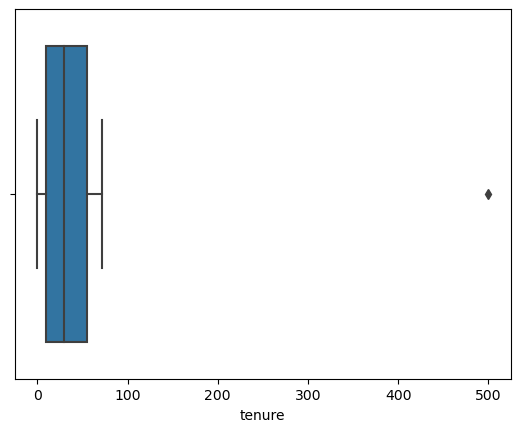

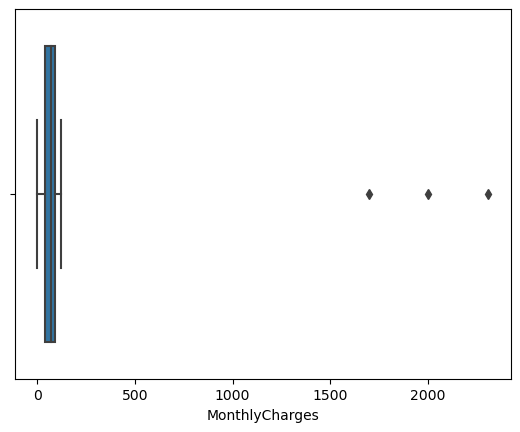

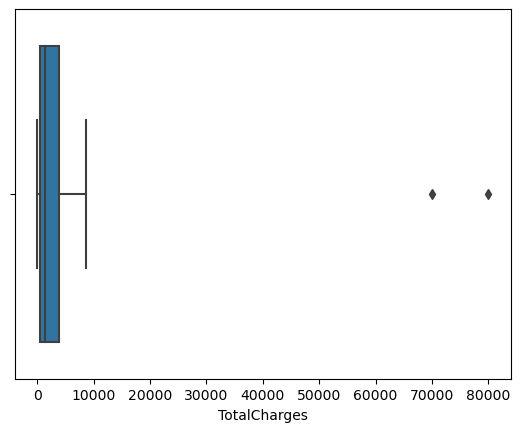

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Distribusi data pada kolom tenure, MonthlyCharges, TotalCharges dengan outliers :")
print(data[['tenure','MonthlyCharges','TotalCharges']].describe())

for col in ['tenure','MonthlyCharges','TotalCharges'] :
    plt.figure()
    sns.boxplot(x=data[col])
    plt.show()

## Mengganti nilai-nilai Outlier berdasarkan batas nilai IQR (Interquartile Range)

In [8]:
# Mengganti nilai-nilai Outlier berdasarkan batas nilai menggunakan IQR
Q1 = data[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = data[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
IQR = Q3-Q1

maksimum = Q3 + (1.5*IQR)
print("Nilai batas maksimum dari masing-masing kolom :")
print(maksimum)

minimum = Q1 - (1.5*IQR)
print("\nNilai batas minimum dari masing-masing kolom :")
print(minimum)

more_than = (data>maksimum)
lower_than = (data<minimum)

data = data.mask(more_than,maksimum,axis=1)
data = data.mask(lower_than,minimum,axis=1)

print("\nDistribusi data yang baru setelah Outliers ditangani:")
data[['tenure','MonthlyCharges','TotalCharges']].describe()

Nilai batas maksimum dari masing-masing kolom :
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai batas minimum dari masing-masing kolom :
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Distribusi data yang baru setelah Outliers ditangani:


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


## Cek nilai-nilai unik untuk setiap kolom kategori

In [9]:
kategorikal = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'
 ,'PaperlessBilling','PaymentMethod','Churn']

for col in kategorikal :
    print("\nNilai unik kolom {} sebelum distandarisasi:".format(col))
    print(data[col].value_counts())


Nilai unik kolom gender sebelum distandarisasi:
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Nilai unik kolom SeniorCitizen sebelum distandarisasi:
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Nilai unik kolom Partner sebelum distandarisasi:
No     3591
Yes    3359
Name: Partner, dtype: int64

Nilai unik kolom Dependents sebelum distandarisasi:
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Nilai unik kolom PhoneService sebelum distandarisasi:
Yes    6281
No      669
Name: PhoneService, dtype: int64

Nilai unik kolom MultipleLines sebelum distandarisasi:
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Nilai unik kolom InternetService sebelum distandarisasi:
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Nilai unik kolom OnlineSecurity sebelum distandarisasi:
No                     3454
Yes 

## Mengganti nilai unik yang salah pada kolom kategori

In [10]:
data.replace(['Wanita','Laki-Laki','Iya',"Churn"],['Female','Male','Yes',"Yes"],inplace=True)
for i in list(['gender','Dependents','Churn']) :
    print("\nNilai Unik Kolom {} setelah Distandarisasi :".format(i))
    print(data[i].value_counts())


Nilai Unik Kolom gender setelah Distandarisasi :
Male      3505
Female    3445
Name: gender, dtype: int64

Nilai Unik Kolom Dependents setelah Distandarisasi :
No     4870
Yes    2080
Name: Dependents, dtype: int64

Nilai Unik Kolom Churn setelah Distandarisasi :
No     5114
Yes    1836
Name: Churn, dtype: int64


# MODELLING : CUSTOMER CHURN PREDICTION

## Load data yang sudah bersih

In [11]:
df = data.copy().reset_index(drop=True)
print("Bentuk data:",data.shape)
df

Bentuk data: (6950, 22)


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
2,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
3,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
6946,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
6947,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
6948,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


## Visualisasi Univariat : Melihat distribusi kolom Churn

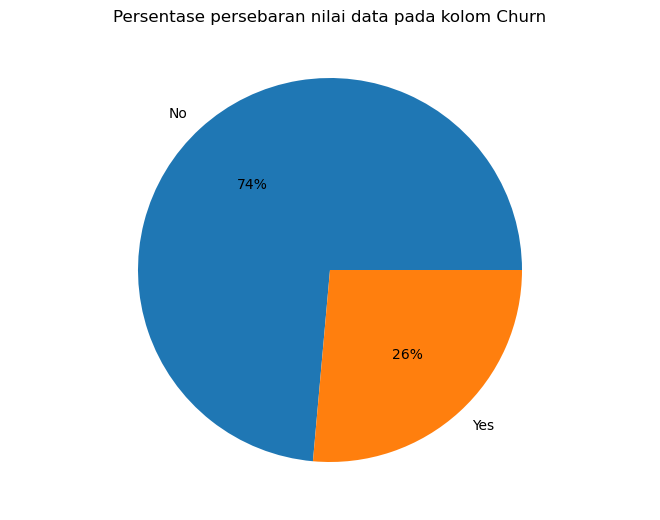

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = df.Churn.unique()
churn = df.Churn.value_counts()
ax.pie(churn,labels=labels,autopct='%.0f%%')
ax.set_title("Persentase persebaran nilai data pada kolom Churn")
plt.show()

## Visualisasi Bivariat : Membandingkan setiap nilai pada kolom Churn untuk masing-masing kolom numerik

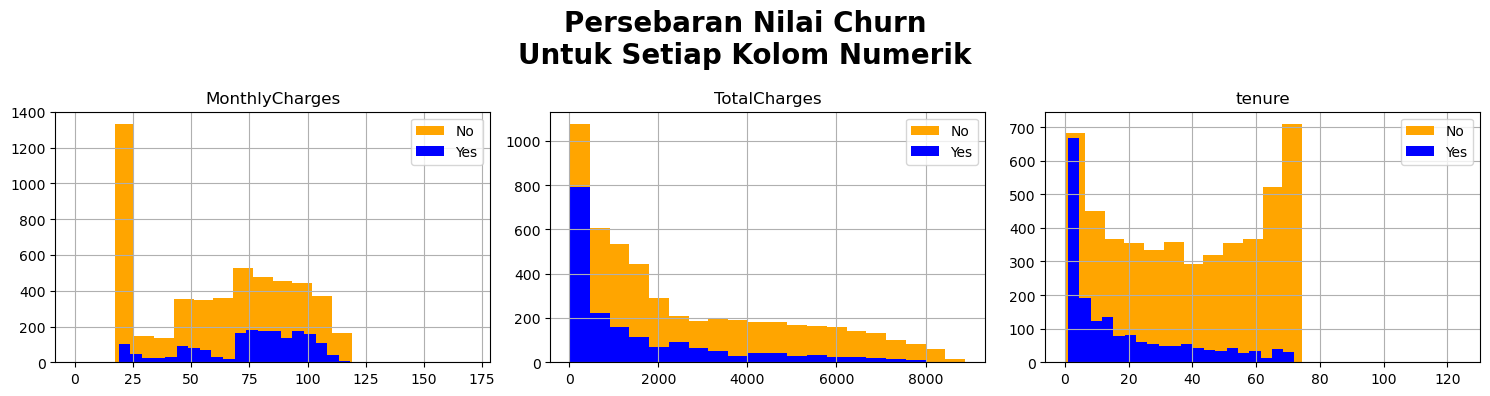

In [13]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
numeric_col = ['MonthlyCharges','TotalCharges','tenure']
df[df.Churn=='No'][numeric_col].hist(bins=20,ax=ax,color='orange',label='No')
df[df.Churn=='Yes'][numeric_col].hist(bins=20,ax=ax,color='blue',label='Yes')
for axis in ax :
    axis.legend()
plt.suptitle('Persebaran Nilai Churn\nUntuk Setiap Kolom Numerik',size=20,weight='bold')
plt.tight_layout()
plt.show()

## Visualisasi Bivariat : Membandingkan setiap nilai pada kolom Churn untuk masing-masing kolom kategorik

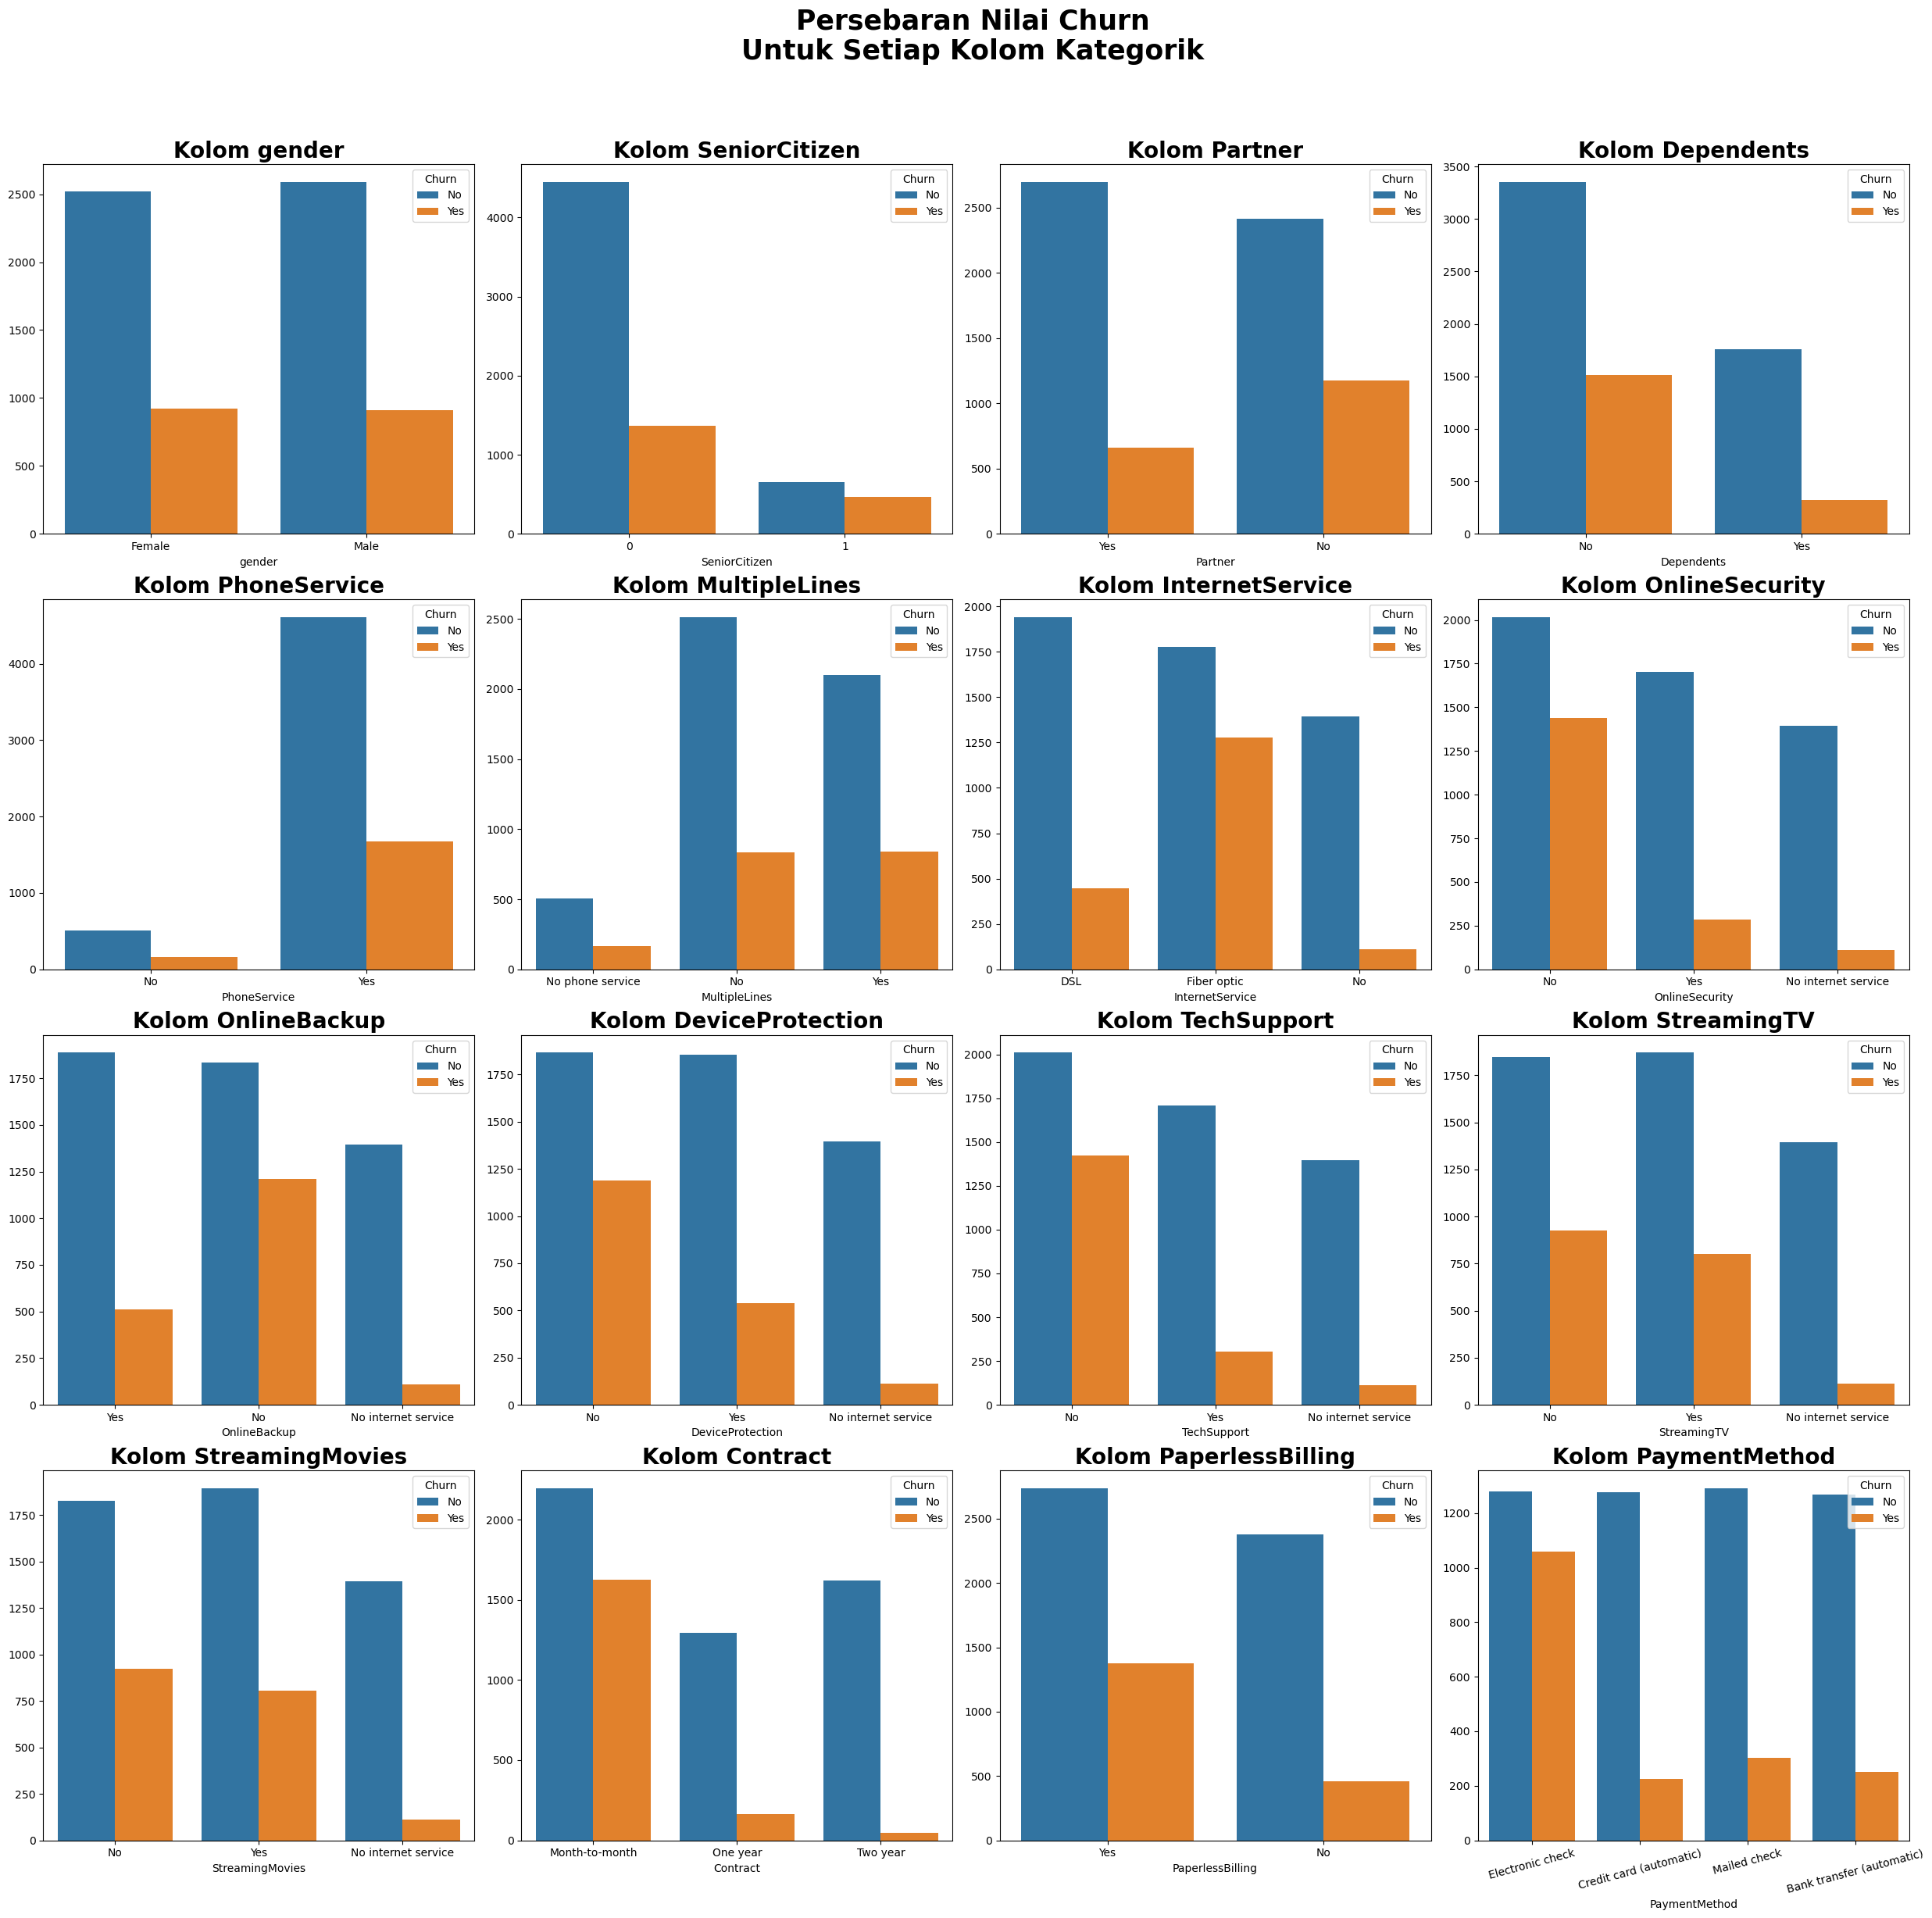

In [14]:
fig, ax = plt.subplots(4,4,figsize=(25,25))
categoric_col = [i for i in data.columns if i not in numeric_col+['UpdatedAt','customerID','Churn']]
iterator = -1
for i in range(4) :
    for j in range(4) :
        iterator += 1
        sns.countplot(data=df,x=categoric_col[iterator],hue='Churn',ax=ax[i][j])
        ax[i][j].set_title("Kolom {}".format(categoric_col[iterator]),size=20,weight='bold')
        ax[i][j].set_ylabel("")
        if len(df[categoric_col[iterator]].unique()) > 3 :
            ax[i][j].set_xticklabels(df[categoric_col[iterator]].unique(),rotation=15)
plt.suptitle('Persebaran Nilai Churn\nUntuk Setiap Kolom Kategorik',size=25,weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Membuang kolom-kolom yang tidak diperlukan untuk modelling

In [15]:
cleaned_df = df.drop(['UpdatedAt','customerID','Dependents','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                      'TechSupport','StreamingMovies', 'Contract', 'PaymentMethod'],axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,1.0,No,DSL,No,Yes,29.85,29.85,No
1,Female,0,No,60.0,Yes,DSL,Yes,Yes,70.15,4224.70,No
2,Male,0,Yes,39.0,Yes,DSL,Yes,No,80.00,3182.95,Yes
3,Male,0,Yes,12.0,Yes,Fiber optic,No,Yes,84.60,959.90,No
4,Female,0,Yes,71.0,Yes,No,No internet service,No,19.90,1397.30,No


## Encoding kolom kategorik yang belum berbentuk numerik

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
kategorikal = ['gender','Partner','PhoneService','InternetService','StreamingTV','PaperlessBilling','Churn']
for col in kategorikal :
    cleaned_df[col] = LE.fit_transform(cleaned_df[col])
cleaned_df.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.423165,0.903741,0.872950,0.985180,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.581073,0.294967,0.737618,0.885069,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,124.000000,1.000000,2.000000,2.000000,1.000000,169.931250,8889.131250,1.000000


## Split dataset menjadi data train dan data test

In [17]:
from sklearn.model_selection import train_test_split
X = cleaned_df.drop('Churn',axis=1)
y = cleaned_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print("Dimensi dari X_train : {}, Dimensi dari y_train : {}".format(X_train.shape,y_train.shape))
print("Persentasi Churn pada data training :")
print(y_train.value_counts(normalize=True))
print("Dimensi dari X_test : {}, Dimensi dari y_test : {}".format(X_test.shape,y_test.shape))
print("Persentasi Churn pada data training :")
print(y_test.value_counts(normalize=True))

Dimensi dari X_train : (4865, 10), Dimensi dari y_train : (4865,)
Persentasi Churn pada data training :
0    0.736691
1    0.263309
Name: Churn, dtype: float64
Dimensi dari X_test : (2085, 10), Dimensi dari y_test : (2085,)
Persentasi Churn pada data training :
0    0.733813
1    0.266187
Name: Churn, dtype: float64


# Modelling : Regresi Logistik

## Fitting model

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Mengukur performansi model pada data training: Matriks Classification Report

In [54]:
from sklearn.metrics import classification_report
y_train_pred = log_reg.predict(X_train)
print("Matriks classification_report :")
print(classification_report(y_train,y_train_pred))

Matriks classification_report :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3584
           1       0.65      0.47      0.55      1281

    accuracy                           0.79      4865
   macro avg       0.74      0.69      0.71      4865
weighted avg       0.78      0.79      0.78      4865



## Mengukur performansi model pada data training: Confusion Matrix

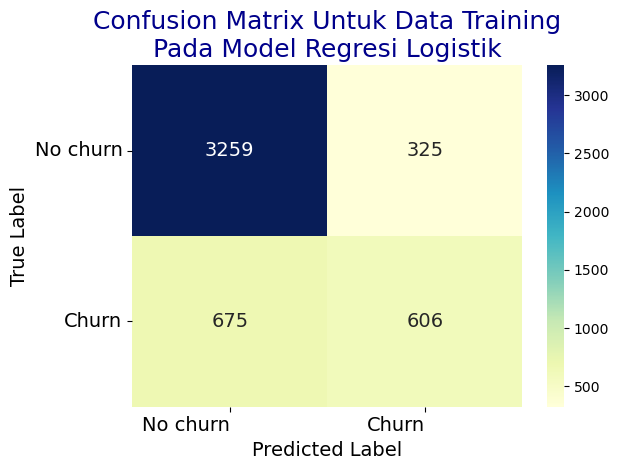

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train,y_train_pred)
cm_df = pd.DataFrame(cm,("No churn","Churn"),("No churn","Churn"))

plt.figure()
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size":14},fmt='d',cmap="YlGnBu")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),size=14,rotation=0,ha='right')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),size=14,rotation=0,ha='right')
plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("True Label",fontsize=14)
plt.title("Confusion Matrix Untuk Data Training\nPada Model Regresi Logistik",fontsize=18,color='darkblue')
plt.tight_layout()
plt.show()

## Mengukur performansi model pada data testing: Matriks Classification Report

In [57]:
y_test_pred = log_reg.predict(X_test)
print("Matriks classification report :")
print(classification_report(y_test,y_test_pred))

Matriks classification report :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1530
           1       0.65      0.50      0.57       555

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.72      2085
weighted avg       0.78      0.79      0.79      2085



## Mengukur performansi model pada data testing: Confusion Matrix

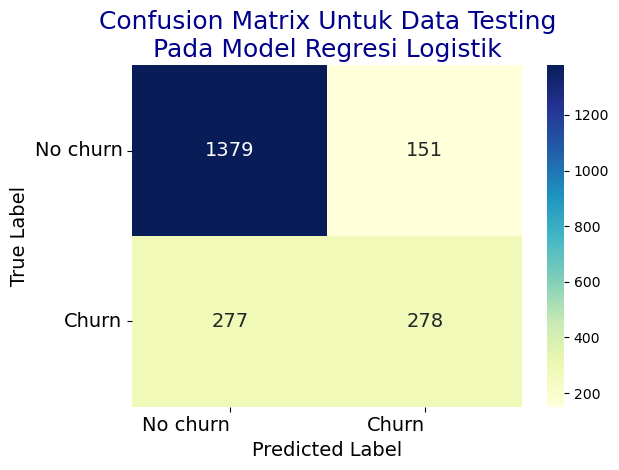

In [58]:
cm = confusion_matrix(y_test,y_test_pred)
cm_df = pd.DataFrame(cm,("No churn","Churn"),("No churn","Churn"))

plt.figure()
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size":14},fmt='d',cmap="YlGnBu")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),size=14,rotation=0,ha='right')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),size=14,rotation=0,ha='right')
plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("True Label",fontsize=14)
plt.title("Confusion Matrix Untuk Data Testing\nPada Model Regresi Logistik",fontsize=18,color='darkblue')
plt.tight_layout()
plt.show()

Kesimpulan dari hasil evaluasi model Regresi Logistik dengan parameter default :
- Performa model pada data training berdasarkan pada classification report adalah 79 % dengan TP (True Positive) berjumlah 3259, FP (False Positive) berjumlah 325, FN (False Negative) berjumlah 675, dan TN (True Negative) berjumlah 606
- Performa model pada data testing berdasarkan pada classification report adalah 79 % dengan TP (True Positive) berjumlah 1379, FP (False Positive) berjumlah 151, FN (False Negative) berjumlah 277, dan TN (True Negative) berjumlah 278

catatan:
- Positive = No churn
- Negative = Churn

# Modelling : Random Forest

## Fitting Model

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

## Mengukur performansi model pada data training: Matriks Classification Report

In [61]:
y_train_pred = rfc.predict(X_train)
print("Matriks classification_report :")
print(classification_report(y_train,y_train_pred))

Matriks classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3584
           1       1.00      0.99      0.99      1281

    accuracy                           1.00      4865
   macro avg       1.00      1.00      1.00      4865
weighted avg       1.00      1.00      1.00      4865



## Mengukur performansi model pada data training: Confusion Matrix

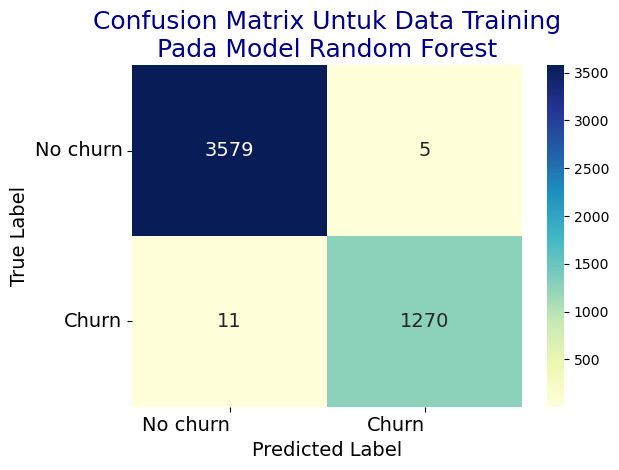

In [62]:
cm = confusion_matrix(y_train,y_train_pred)
cm_df = pd.DataFrame(cm,("No churn","Churn"),("No churn","Churn"))

plt.figure()
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size":14},fmt='d',cmap="YlGnBu")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),size=14,rotation=0,ha='right')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),size=14,rotation=0,ha='right')
plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("True Label",fontsize=14)
plt.title("Confusion Matrix Untuk Data Training\nPada Model Random Forest",fontsize=18,color='darkblue')
plt.tight_layout()
plt.show()

## Mengukur performansi model pada data testing: Matriks Classification Report

In [64]:
y_test_pred = rfc.predict(X_test)
print("Matriks classification_report :")
print(classification_report(y_test,y_test_pred))

Matriks classification_report :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1530
           1       0.59      0.49      0.53       555

    accuracy                           0.77      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.77      0.76      2085



## Mengukur performansi model pada data testing: Confusion Matrix

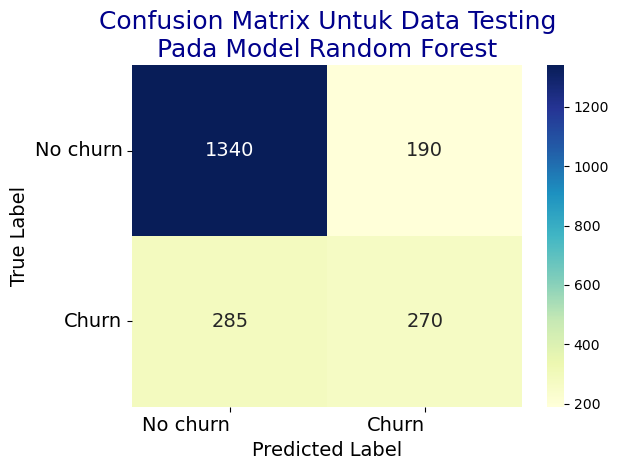

In [65]:
cm = confusion_matrix(y_test,y_test_pred)
cm_df = pd.DataFrame(cm,("No churn","Churn"),("No churn","Churn"))

plt.figure()
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size":14},fmt='d',cmap="YlGnBu")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),size=14,rotation=0,ha='right')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),size=14,rotation=0,ha='right')
plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("True Label",fontsize=14)
plt.title("Confusion Matrix Untuk Data Testing\nPada Model Random Forest",fontsize=18,color='darkblue')
plt.tight_layout()
plt.show()

Kesimpulan dari hasil evaluasi model Random Forest dengan parameter default :
- Performa model pada data training berdasarkan pada classification report adalah 100 % dengan TP (True Positive) berjumlah 3579, FP (False Positive) berjumlah 5, FN (False Negative) berjumlah 11, dan TN (True Negative) berjumlah 1270
- Performa model pada data testing berdasarkan pada classification report adalah 77% dengan TP (True Positive) berjumlah 1340, FP (False Positive) berjumlah 190, FN (False Negative) berjumlah 285, dan TN (True Negative) berjumlah 270

catatan :
- Positive = No churn
- Negative = Churn

# Modelling : Gradient Boosting

## Fitting Model

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

## Mengukur performansi model pada data training: Matriks Classification Report

In [80]:
y_train_pred = gbc.predict(X_train)
print("Matriks classification_report :")
print(classification_report(y_train,y_train_pred))

Matriks classification_report :
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3584
           1       0.70      0.54      0.61      1281

    accuracy                           0.82      4865
   macro avg       0.77      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



## Mengukur performansi model pada data training: Confusion Matrix

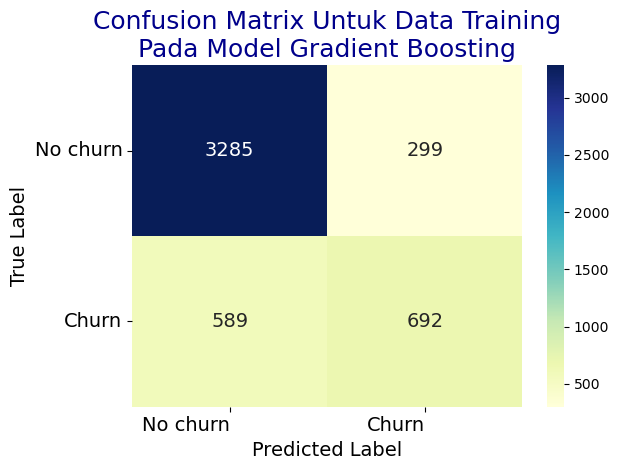

In [82]:
cm = confusion_matrix(y_train,y_train_pred)
cm_df = pd.DataFrame(cm,("No churn","Churn"),("No churn","Churn"))

plt.figure()
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size":14},fmt='d',cmap="YlGnBu")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),size=14,rotation=0,ha='right')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),size=14,rotation=0,ha='right')
plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("True Label",fontsize=14)
plt.title("Confusion Matrix Untuk Data Training\nPada Model Gradient Boosting",fontsize=18,color='darkblue')
plt.tight_layout()
plt.show()

## Mengukur performansi model pada data testing: Matriks Classification Report

In [78]:
y_test_pred = rfc.predict(X_test)
print("Matriks classification_report :")
print(classification_report(y_test,y_test_pred))

Matriks classification_report :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1530
           1       0.59      0.49      0.53       555

    accuracy                           0.77      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.77      0.76      2085



## Mengukur performansi model pada data testing: Confusion Matrix

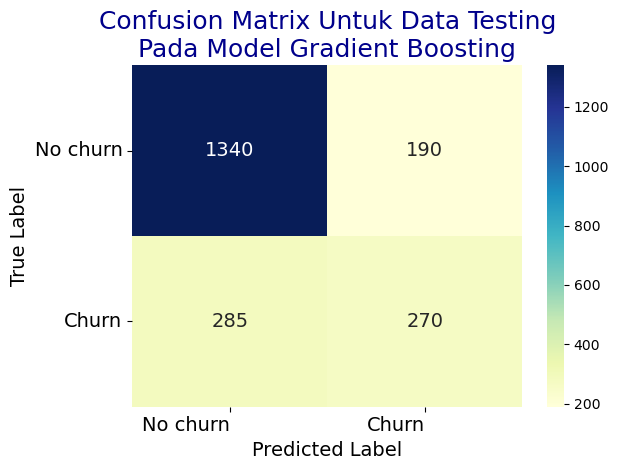

In [79]:
cm = confusion_matrix(y_test,y_test_pred)
cm_df = pd.DataFrame(cm,("No churn","Churn"),("No churn","Churn"))

plt.figure()
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size":14},fmt='d',cmap="YlGnBu")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),size=14,rotation=0,ha='right')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),size=14,rotation=0,ha='right')
plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("True Label",fontsize=14)
plt.title("Confusion Matrix Untuk Data Testing\nPada Model Gradient Boosting",fontsize=18,color='darkblue')
plt.tight_layout()
plt.show()

Kesimpulan dari hasil evaluasi model Gradient Boosting dengan parameter default :
- Performa model pada data training berdasarkan pada classification report adalah 82% dengan TP (True Positive) berjumlah 3285, FP (False Positive) berjumlah 299, FN (False Negative) berjumlah 589, dan TN (True Negative) berjumlah 692
- Performa model pada data testing berdasarkan pada classification report adalah 77% dengan TP (True Positive) berjumlah 1340, FP (False Positive) berjumlah 190, FN (False Negative) berjumlah 285, dan TN (True Negative) berjumlah 270

catatan :
- Positive = No churn
- Negative = Churn

# Kesimpulan

Dari ketiga model yang telah dilatih, ternyata performa yang paling optimal dihasilkan oleh Model Regresi Logistik. Ini dapat dilihat dari akurasi pada data training dan data testing yang sama-sama bernilai 79%

# Menyimpan model terbaik ke dalam file 

Model disimpan untuk keperluan deployment, agar nantinya tidak usah mengulang pemodelan kembali

In [85]:
import pickle
pickle.dump(log_reg,open('best_model_churn.pkl','wb'))